# 3 . ML and Math: 확통, 최적화

### 15P: 평균 벡터와 공분산 행렬 예제

In [ ]:
import numpy as np

# row1 = sample1, row2 = sample2 / column1 = 특징1, column2 = 특징2
x = np.array([[5.1,3.5,1.4,0.2], [4.9,3.0,1.4,0.2], [4.7,3.2,1.3,0.2], [4.6,3.1,1.5,0.2], [5.0,3.6,1.4,0.2], [5.4,3.9,1.7,0.4], [4.6,3.4,1.4,0.3], [5.0,3.4,1.5,0.2]])
print(x, '\n\n')

# 평균값
# axis = 0 : 열마다 평균내기, axis = 1 : 행마다 평균내기
x_mean = x.mean(axis=0)
print(x_mean, '\n\n')

# 공분산 행렬 - np.cov(한 샘플 한 행이 아니라 한 열인 행렬, ddof=0)
x_var = np.cov(x.T, ddof=0)
print(x_var)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]] 


[4.9125 3.3875 1.45   0.2375] 


[[0.06609375 0.05265625 0.018125   0.00828125]
 [0.05265625 0.07359375 0.018125   0.01296875]
 [0.018125   0.018125   0.0125     0.005625  ]
 [0.00828125 0.01296875 0.005625   0.00484375]]


### 20p: 자기 정보와 엔트로피 예제

In [ ]:
import math

prob_yut = np.array([4/16, 6/16, 4/16, 1/16, 1/16])
# 윷의 엔트로피
H_yut = 0
for i in prob_yut:
  H_yut += -i * math.log2(i)

print(H_yut, '\n\n')

prob_dice = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
# 주사위의 엔트로피
H_dice = 0
for i in prob_dice:
  H_dice += - i * math.log2(i)

print(H_dice)

# 윷은 균일 확률 X -> 불확실성(엔트로피) 낮음
# 주사위는 균일 확률 -> 불확실성(엔트로피) 높음

2.0306390622295662 


2.584962500721156


### +) 22p: 교차 엔트로피와 KL 다이버전스 예제

In [ ]:
import math

prob_normal_P = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
prob_abnormal_Q = np.array([3/12, 1/12, 1/12, 1/12, 3/12, 3/12])

# KL 다이버전스
KL = 0
for i in range(0, 6):
  KL += prob_normal_P[i] * math.log2(prob_normal_P[i]/prob_abnormal_Q[i])

print("KL = ", KL, '\n\n')

# P와 Q의 교차 엔트로피
H = 0
for i in range(0, 6):
  H += - prob_normal_P[i] * math.log2(prob_abnormal_Q[i])

print("H = ", H)

KL =  0.20751874963942182 


H =  2.792481250360578


# 4. Probabilistic Classification: 최소오류 베이시언, 최소위험 베이시언, 최소거리 분류기

## 22p: 행렬식과 역행렬 구하기

In [ ]:
import numpy as np

mu = np.array([3, 1])
Sigma = np.array([[2, 0],[0, 2]])


# 행렬식
det_Sigma = np.linalg.det(Sigma)
# 역행렬
inv_Sigma = np.linalg.inv(Sigma)

print(det_Sigma)
print(inv_Sigma)


4.0
[[0.5 0. ]
 [0.  0.5]]


## 26p: 정규분포에서 베이시언 분류기 - 결정경계 g12(x) - 공분산 행렬이 같은 경우

In [ ]:
import numpy as np

omega_1 = np.transpose(np.array([[1,2],[3,1],[5,2],[3,3]]))

print(omega_1)

# 평균벡터, 공분산
# axis=0: 열마다, axis=1: 행마다
omega1_mean = omega_1.mean(axis=1)
omega1_var = np.cov(omega_1, ddof=0)

omega_2 = np.transpose(np.array([[6,6],[8,5],[10,6],[8,7]]))
omega2_mean = omega_2.mean(axis=1)
omega2_var = np.cov(omega_2, ddof=0)

print('mu_1=', omega1_mean)
print('mu_2=', omega2_mean)

print('Sigma_1=\n', omega1_var)
print('Sigma_2=\n', omega2_var)

# 공분산의 역행렬
inv_Sigma = np.linalg.inv(omega1_var)

# @ : 행렬이나 벡터의 곱
coef_1 = inv_Sigma @ (omega1_mean - omega2_mean)
coef_2 = - 1/2*omega1_mean.T @ inv_Sigma @ omega1_mean + 1/2*omega2_mean.T @ inv_Sigma @ omega2_mean

print('coef_1=', coef_1)
print('coef_2=', coef_2)

[[1 3 5 3]
 [2 1 2 3]]
mu_1= [3. 2.]
mu_2= [8. 6.]
Sigma_1=
 [[2.  0. ]
 [0.  0.5]]
Sigma_2=
 [[2.  0. ]
 [0.  0.5]]
coef_1= [-2.5 -8. ]
coef_2= 45.75


## 27, 28p: 정규분포에서 베이시언 분류기 - 결정경계 g12(x) - 공분산 행렬이 다른 경우

mu_1= [3. 2.]
mu_2= [8. 6.]
Sigma_1=
 [[2.  0. ]
 [0.  0.5]]
Sigma_2=
 [[0.5 0. ]
 [0.  2. ]]


[[1 2]
 [3 1]
 [5 2]
 [3 3]
 [7 6]
 [8 4]
 [9 6]
 [8 8]]
[0 0 0 0 1 1 1 1]


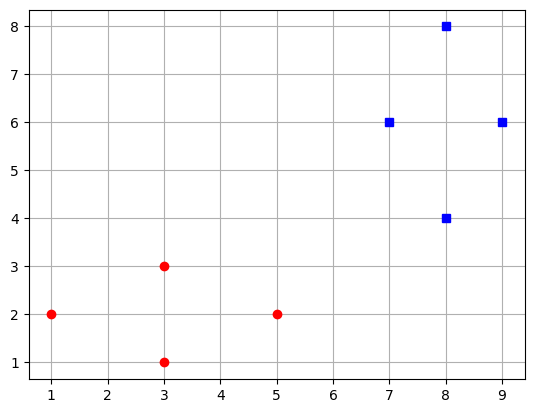

coef_1 = 
 [[ 0.75  0.  ]
 [ 0.   -0.75]]
coef_2 = [-14.5   1. ]
coef_3 = 66.75
coef_3_08_02 = 272.5451774444796
coef_3_05_05 = 267.0
coef_3_02_08 = 261.4548225555204


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 부류 1의 평균과 분산, coef 1-3
omega_1 = np.transpose(np.array([[1,2],[3,1],[5,2],[3,3]]))#, [4,2], [2,4], [1,1], [2,2], [4,4]]))
y_omega1 = np.array([0, 0, 0, 0])#, 0, 0, 0, 0, 0])
omega1_mean = omega_1.mean(axis=1)
omega1_var = np.cov(omega_1, ddof=0)

inv_Sigma1 = np.linalg.inv(omega1_var)

coef1_for_g1 = - 1/2 * inv_Sigma1
coef2_for_g1 = omega1_mean.T @ inv_Sigma1
# np.log : ln함수,  np.linalg.det : 행렬식
coef3_for_g1 = - 1/2 * omega1_mean.T @ inv_Sigma1 @ omega1_mean - 1/2 * np.log(np.linalg.det(omega1_var))

# 부류 2의 평균과 분산, coef 1-3
omega_2 = np.transpose(np.array([[7,6],[8,4],[9,6],[8,8]]))
y_omega2 = np.array([1, 1, 1, 1])
omega2_mean = omega_2.mean(axis=1)
omega2_var = np.cov(omega_2, ddof=0)

inv_Sigma2 = np.linalg.inv(omega2_var)

coef1_for_g2 = - 1/2 * inv_Sigma2
coef2_for_g2 = omega2_mean.T @ inv_Sigma2
coef3_for_g2 = - 1/2 * omega2_mean.T @ inv_Sigma2 @ omega2_mean - 1/2 * np.log(np.linalg.det(omega2_var))

print('mu_1=', omega1_mean)
print('mu_2=', omega2_mean)

print('Sigma_1=\n', omega1_var)
print('Sigma_2=\n', omega2_var)
print('\n')

# np.concatenate(A1, B1) : 행렬 합치기 - default: axis = 0
x_train = np.concatenate([omega_1.T, omega_2.T])
y_train = np.concatenate([y_omega1, y_omega2])
print(x_train)
print(y_train)

# 여러 개 그래프 그리기 : plt.plot(Xm Y1, 'r--', X, Y2, 'bs', X, Y3, 'g^')
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
# plt.grid(True) : True-격자 활성화, False-격자 비활성화
plt.grid(True)
plt.show()

coef1_for_g12 = coef1_for_g1 - coef1_for_g2
coef2_for_g12 = coef2_for_g1 - coef2_for_g2
coef3_for_g12 = coef3_for_g1 - coef3_for_g2

print('coef_1 = \n', coef1_for_g12)
print('coef_2 =', coef2_for_g12)
print('coef_3 =', coef3_for_g12)

coef3_for_g12_08_02 = coef3_for_g12 + np.log(0.8)-np.log(0.2)
coef3_for_g12_05_05 = coef3_for_g12 + np.log(0.5)-np.log(0.5)
coef3_for_g12_02_08 = coef3_for_g12 + np.log(0.2)-np.log(0.8)

print('coef_3_08_02 =', 4*coef3_for_g12_08_02)
print('coef_3_05_05 =', 4*coef3_for_g12_05_05)
print('coef_3_02_08 =', 4*coef3_for_g12_02_08)

## 30p: 최소 거리 분류기 - 마할라노비스, 유클리디언 거리

In [ ]:
import math
import numpy as np

omega_1 = np.transpose(np.array([[1,2],[3,1],[5,2],[3,3]]))
omega1_mean = omega_1.mean(axis=1)
omega1_var = np.cov(omega_1, ddof=0)

omega_2 = np.transpose(np.array([[6,6],[8,5],[10,6],[8,7]]))
omega2_mean = omega_2.mean(axis=1)
omega2_var = np.cov(omega_2, ddof=0)


inv_Sigma = np.linalg.inv(omega1_var)

print(inv_Sigma)

x = np.transpose(np.array([8, 2]))

# 마할라노비스 거리
# math.sqrt = 루트
Mahala_dist1 = math.sqrt( (x - omega1_mean).T @ inv_Sigma @ (x - omega1_mean) )
Mahala_dist2 = math.sqrt( (x - omega2_mean).T @ inv_Sigma @ (x - omega2_mean) )

print('Mahala distance from mean of omega 1 =',Mahala_dist1)
print('Mahala distance from mean of omega 2 =',Mahala_dist2)

# 유클리디언 거리 - norm 값
Euclidean_dist1 = np.linalg.norm(x - omega1_mean)
Euclidean_dist2 = np.linalg.norm(x - omega2_mean)

print('Euclidean distance from mean of omega 1 =',Euclidean_dist1)
print('Euclidean distance from mean of omega 2 =',Euclidean_dist2)

[[2.  0. ]
 [0.  0.5]]
[[0.5 0. ]
 [0.  2. ]]
Mahala distance from mean of omega 1 = 3.5355339059327378
Mahala distance from mean of omega 2 = 5.656854249492381
Euclidean distance from mean of omega 1 = 5.0
Euclidean distance from mean of omega 2 = 4.0


# 과제 1: 최소 오류 베이시언 분류기

## 2번

In [ ]:
import numpy as np

# 평균벡터, 공분산
omega_1 = np.transpose(np.array([[1,2],[2,0],[3,2],[2,4]]))
omega1_mean = omega_1.mean(axis=1)
omega1_var = np.cov(omega_1, ddof=0)

omega_2 = np.transpose(np.array([[7,6],[8,4],[9,6],[8,8]]))
omega2_mean = omega_2.mean(axis=1)
omega2_var = np.cov(omega_2, ddof=0)

print('mu_1=', omega1_mean)
print('var_1 = \n', omega1_var)
print('mu_2 = ', omega2_mean)
print('var_2 = \n', omega2_var)

mu_1= [2. 2.]
var_1 = 
 [[0.5 0. ]
 [0.  2. ]]
mu_2 =  [8. 6.]
var_2 = 
 [[0.5 0. ]
 [0.  2. ]]


# 6 . 신경망 및 퍼셉트론: 퍼셉트론, 다층 퍼셉트론

## 19p: 퍼셉트론을 이용한 OR 연산 예제

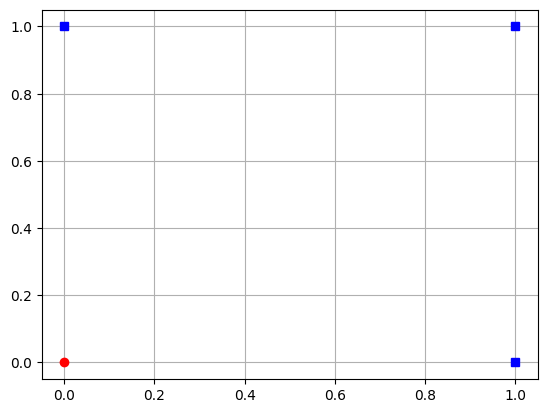

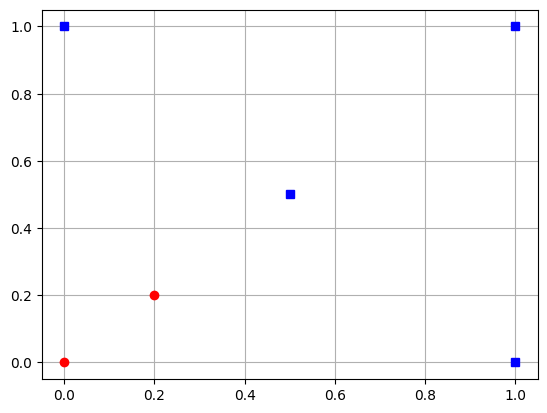

In [ ]:
import numpy as np
# 퍼셉트론
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

# 훈련집합
x_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# 정답
y_train = np.array([0, 1, 1, 1])

# x_train[y_train==0, 1] : y_train이 0인 x_train의 두번째(1)특성만 선택하여 반환
# x_train[y_train==1, 0] : y_train이 1인 x_train의 첫번째(0)특성만 선택하여 반환
plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.grid(True)
plt.show()

ppn = Perceptron()
# 학습과정 -> ppn은 학습된 것
ppn.fit(x_train, y_train)

x_test = np.array([[0.5, 0.5], [0.2, 0.2]])

y_pred = ppn.predict(x_test)

plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.plot(x_test[y_pred==0, 0], x_test[y_pred==0, 1], 'ro', x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'bs')
plt.grid(True)
plt.show()

## 34p: 퍼셉트론 예제

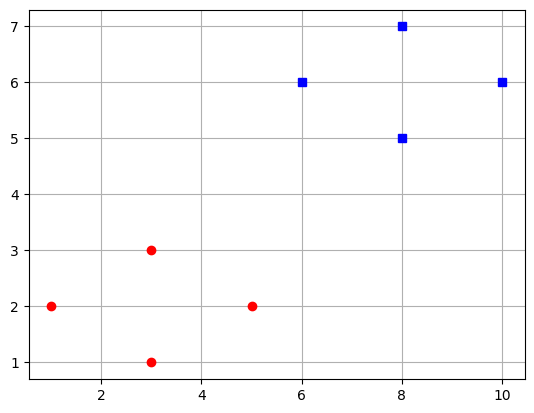

Prediction for perceptron = [0]


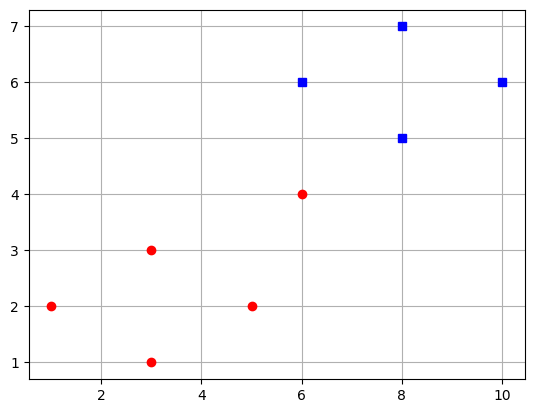

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

# 훈련데이터
omega_1 = (np.array([[1,2],[3,1],[5,2],[3,3]]))
y_omega1 = np.array([0, 0, 0, 0])

omega_2 = (np.array([[6,6],[8,5],[10,6],[8,7]]))
y_omega2 = np.array([1, 1, 1, 1])

x_train = (np.concatenate([omega_1, omega_2]))
y_train = np.concatenate([y_omega1, y_omega2])

#print(x_train)

plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs')
plt.grid(True)
plt.show()

ppn = Perceptron()
ppn.fit(x_train, y_train)

x_test = np.array([[6,4]])

y_pred = ppn.predict(x_test)

print('Prediction for perceptron =', y_pred)

plt.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], 'ro', x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs',
         x_test[y_pred==0, 0], x_test[y_pred==0, 1], 'ro', x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'bs')
# plt.plot(x_test[y_pred==0, 0], x_test[y_pred==0, 1], 'ro', x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'bs')
plt.grid(True)
plt.show()


# 7장


## 15p - 선형 SVM: 두개의 샘플



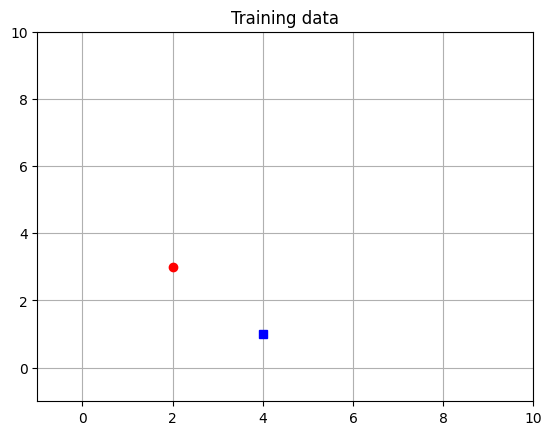

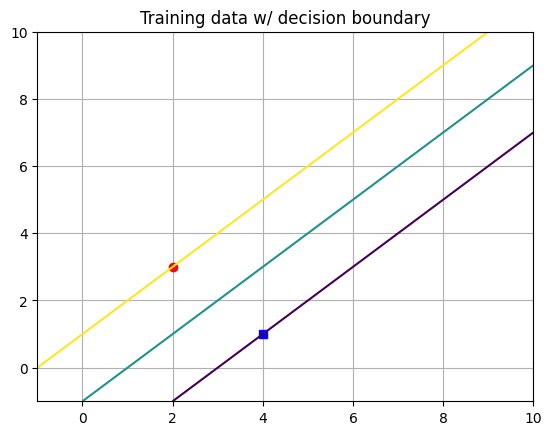

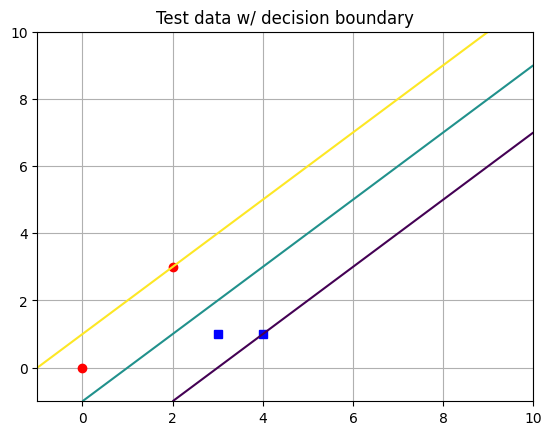

In [ ]:
import numpy as np
# 앞과 달리 perceptron이 아닌 svm
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[2, 3], [4, 1]])
y_train = np.array([1, -1])

plt.title("Training data")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# svm.SVC() -> 어떤 알고리즘 사용할지 선택
svm_clf = svm.SVC(kernel='linear')
# 학습
svm_clf.fit(x_train, y_train)

# Create grid to evaluate model
# 22-33 row: decision boundary 직선 긋기
xx = np.linspace(-1, 10, 30)
yy = np.linspace(-1, 10, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

plt.title("Training data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# test data 예측
x_test = np.array([[0, 0], [3, 1]])
y_pred = svm_clf.predict(x_test)

plt.title("Test data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.plot(x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'ro', x_test[y_pred==-1, 0], x_test[y_pred==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# plot_decision_function(x_train, y_train, x_test, y_test, svm_clf)

## 16p - 선형 SVM: 3개의 샘플



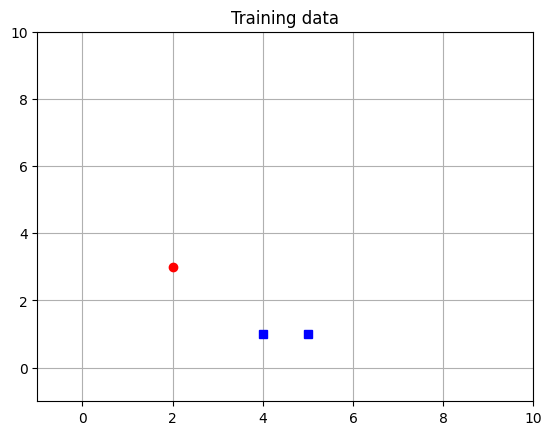

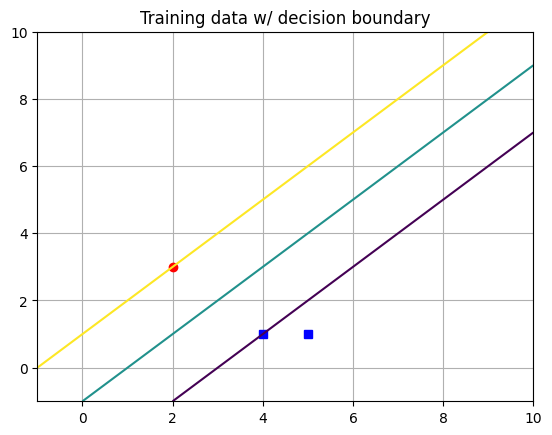

[ 1 -1]


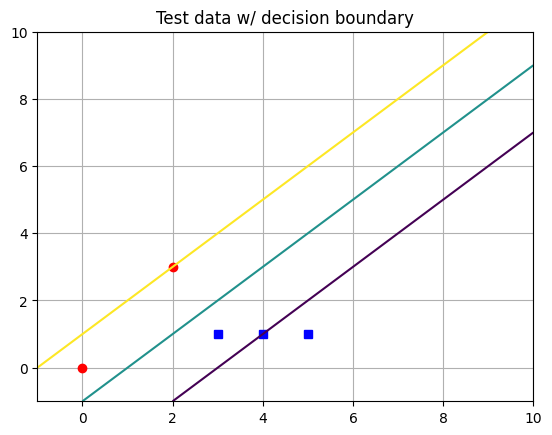

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[2, 3], [4, 1], [5, 1]])
y_train = np.array([1, -1, -1])

plt.title("Training data")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

# Create grid to evaluate model
xx = np.linspace(-1, 10, 30)
yy = np.linspace(-1, 10, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

plt.title("Training data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

x_test = np.array([[0, 0], [3, 1]])
y_pred = svm_clf.predict(x_test)

print(y_pred)

plt.title("Test data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.plot(x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'ro', x_test[y_pred==-1, 0], x_test[y_pred==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# plot_decision_function(x_train, y_train, x_test, y_test, svm_clf)

## 29p - 선형 SVM: 여러개의 샘플

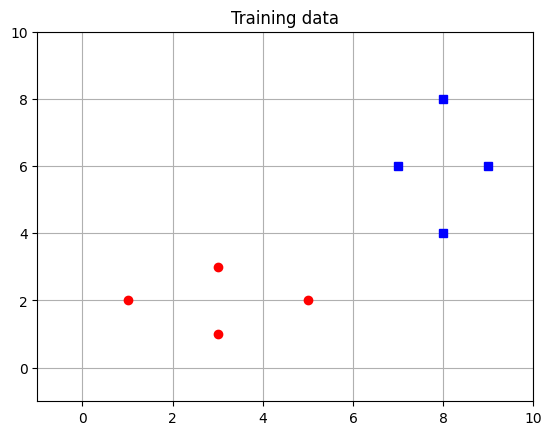

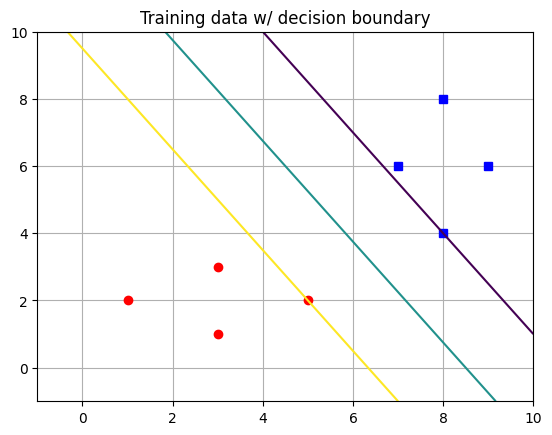

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[1, 2], [3,1], [5, 2], [3,3], [7, 6], [8,4], [9, 6], [8,8]])
y_train = np.array([1, 1, 1, 1, -1, -1, -1, -1])

plt.title("Training data")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)


# Create grid to evaluate model
xx = np.linspace(-1, 10, 30)
yy = np.linspace(-1, 10, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

plt.title("Training data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
plt.axis([-1, 10, -1, 10])
plt.show()

# 과제 2: SVM

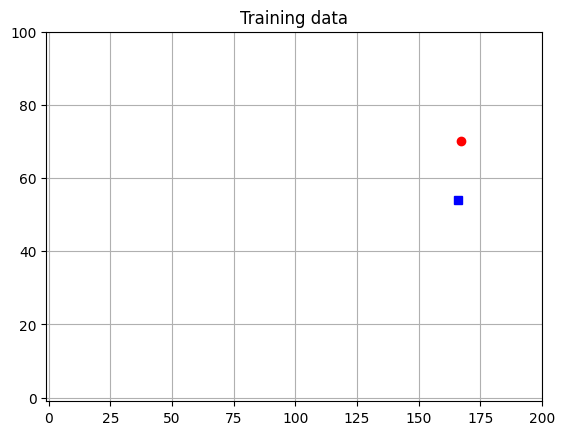

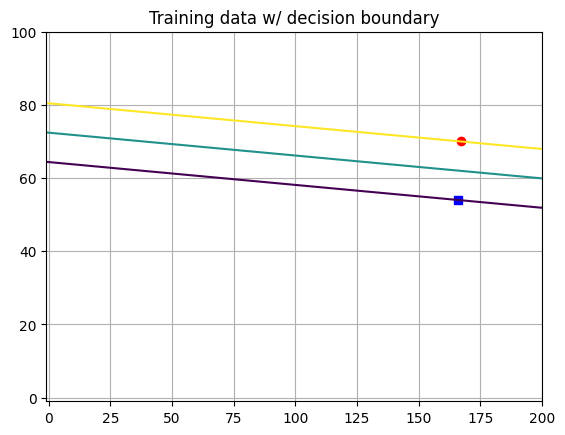

[-1]


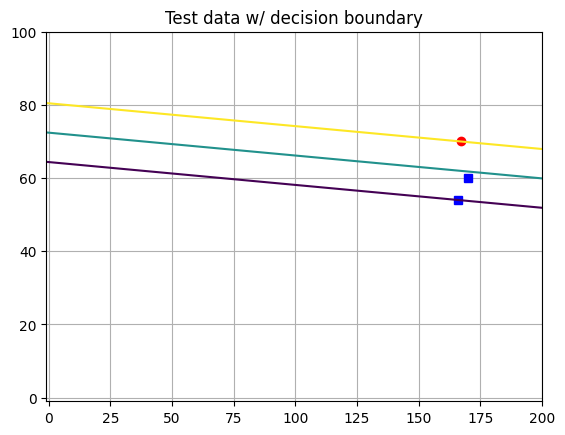

In [ ]:
# 1-1의 SVM
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[167,70],[166,54]])
y_train = np.array([1, -1])

plt.title("Training data")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True)
# 값 범위에 따라 조정
plt.axis([-1, 200, -1, 100])
plt.show()

# svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

# Create grid to evaluate model
# 값 범위에 따라 조정
xx = np.linspace(-1, 200, 30)
yy = np.linspace(-1, 100, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

plt.title("Training data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
# 값 범위에 따라 조정
plt.axis([-1, 200, -1, 100])
plt.show()

x_test = np.array([[170, 60]])
y_pred = svm_clf.predict(x_test)

print(y_pred)

plt.title("Test data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.plot(x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'ro', x_test[y_pred==-1, 0], x_test[y_pred==-1, 1], 'bs')
plt.grid(True)
# 값 범위에 따라 조정
plt.axis([-1, 200, -1, 100])
plt.show()

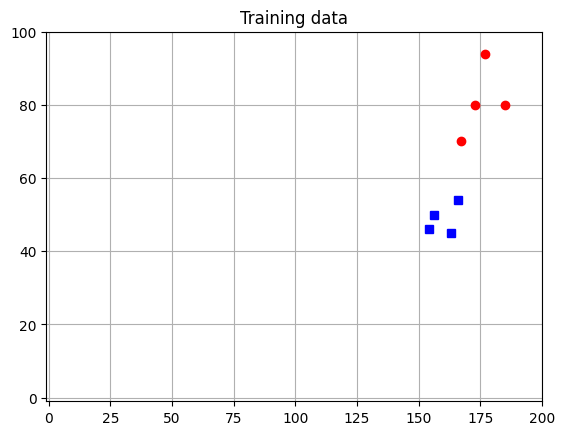

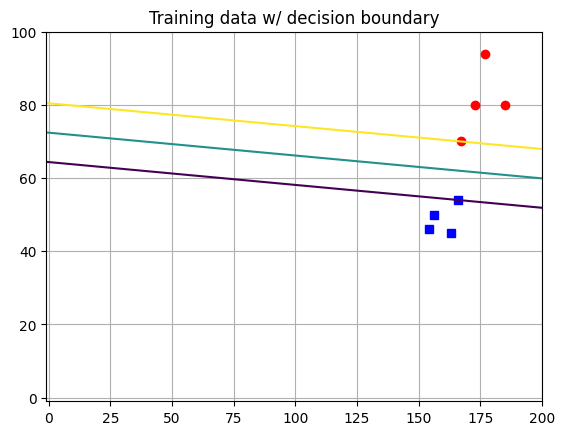

[-1]


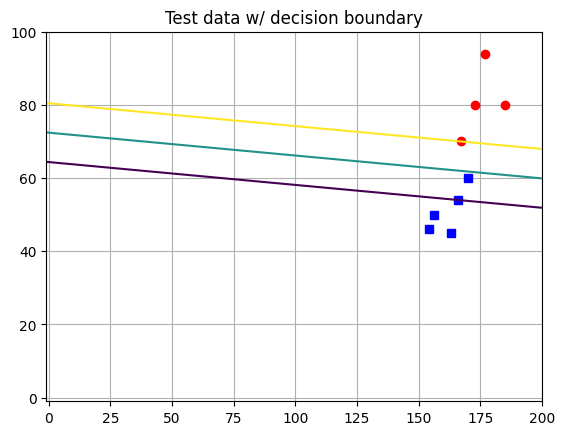

In [ ]:
# 1-2의 SVM
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

x_train = np.array([[173,80],[177,94],[156,50],[167,70],[166,54],[163,45],[154,46],[185,80]])
y_train = np.array([1, 1, -1, 1, -1, -1, -1, 1])

plt.title("Training data")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.grid(True)
# 값 범위에 따라 조정
plt.axis([-1, 200, -1, 100])
plt.show()

# svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

# Create grid to evaluate model
# 값 범위에 따라 조정
xx = np.linspace(-1, 200, 30)
yy = np.linspace(-1, 100, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

plt.title("Training data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.grid(True)
# 값 범위에 따라 조정
plt.axis([-1, 200, -1, 100])
plt.show()

x_test = np.array([[170, 60]])
y_pred = svm_clf.predict(x_test)

print(y_pred)

plt.title("Test data w/ decision boundary")
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'ro', x_train[y_train==-1, 0], x_train[y_train==-1, 1], 'bs')
plt.contour(XX, YY, Z, levels=[-1, 0, 1])
plt.plot(x_test[y_pred==1, 0], x_test[y_pred==1, 1], 'ro', x_test[y_pred==-1, 0], x_test[y_pred==-1, 1], 'bs')
plt.grid(True)
# 값 범위에 따라 조정
plt.axis([-1, 200, -1, 100])
plt.show()

# 8 . 질적분류(결정트리)

## 9P - 엔트로피, 지니, 오분류 불순도 측정

In [ ]:
import numpy as np
import math

# P(wi|T)
p_T = np.array([3/9, 4/9, 2/9])

im_of_entropy = 0
im_of_gini = 1
for i in p_T:
  im_of_entropy += - i*math.log2(i)
  im_of_gini += - i ** 2

im_of_miss = 1 - max(p_T)

print(im_of_entropy)
print(im_of_gini)
print(im_of_miss)

1.5304930567574824
0.6419753086419753
0.5555555555555556


## 13,14p - 불순도 감소량 (지니 불순도)

In [ ]:
# 앞의 9p 예제 돌린 후 돌리기 (im_of_gini)
import numpy as np
import math

sample = np.array([[3, 1, 50.6, 2], [2, 3, 72.8, 1], [3, 5, 88.7, 3], [2, 2, 102.2, 2], [5, 5, 92.3, 2], [3, 4, 65.3, 2], [2, 3, 67.8, 1], [7, 1, 47.8, 3], [2, 3, 45.6, 1]])

# T노드에서 샘플의 수 (shape함수: 2*3행렬이라면 (2,3) tuple return)
N_X_T = sample.shape[0]

print(sample, '\n')

# question x1 == ?
# np.arange(시작점(생략 시 0), 끝점(미포함), step size(생략 시 1)
q_x1 = np.arange(7)+1;
print(q_x1)   #q_x1 : 1~7

for j in q_x1:
  # N_X_left: X_left의 샘플의 수
   # sample.T[0]이 x1 특징있는 위치
  N_X_left = sum(sample.T[0] == j)
  N_X_right = sum(sample.T[0] != j)

  # 왼쪽 노드에 속한 샘플 추출
  sample_left = sample[sample.T[0] == j]
  # 왼쪽 노드 샘플 개수
  N_X_left_T = sample_left.shape[0]
  # 왼쪽 노드 샘플들의 부류(3열)
  sample_left_w = sample_left[:,3]
  # print(j,':',sample_left,'\n')
  # print(j,':',N_X_left_T,'\n')
  # print(j,':',sample_left_w,'\n')
  if N_X_left_T != 0:
    # p_T_left = [P(w1|T), P(w2|T), P(w3|T)]
    p_T_left = np.array([sum(sample_left_w==1), sum(sample_left_w==2), sum(sample_left_w==3)])/N_X_left_T
  else:
    p_T_left = np.zeros(3)

  im_of_gini_left = 1
  for i in p_T_left:
    im_of_gini_left += - i ** 2

  sample_right = sample[sample.T[0] != j]
  N_X_right_T = sample_right.shape[0]
  sample_right_w = sample_right[:,3]
  if N_X_right_T != 0:
    p_T_right = np.array([sum(sample_right_w==1), sum(sample_right_w==2), sum(sample_right_w==3)])/N_X_right_T
  else:
    p_T_right = np.zeros(3)

  im_of_gini_right = 1
  for i in p_T_right:
    im_of_gini_right += - i ** 2

  # x1=a? 질문마다 불순도 감소량 계산
  delta_im_x1 = im_of_gini - N_X_left/N_X_T*im_of_gini_left - N_X_right/N_X_T*im_of_gini_right
  print(f'x1=={j}? : {delta_im_x1}')

[[  3.    1.   50.6   2. ]
 [  2.    3.   72.8   1. ]
 [  3.    5.   88.7   3. ]
 [  2.    2.  102.2   2. ]
 [  5.    5.   92.3   2. ]
 [  3.    4.   65.3   2. ]
 [  2.    3.   67.8   1. ]
 [  7.    1.   47.8   3. ]
 [  2.    3.   45.6   1. ]] 

[1 2 3 4 5 6 7]
x1==1? : 0.0
x1==2? : 0.20864197530864198
x1==3? : 0.0864197530864198
x1==4? : 0.0
x1==5? : 0.058641975308642014
x1==6? : 0.0
x1==7? : 0.11419753086419748


## 특징벡터 x2 기반 질문

In [ ]:
# question x2 == ?
q_x2 = np.arange(5)+1;
print(q_x2)

for j in q_x2:
  N_X_left = sum(sample.T[1] == j)
  N_X_right = sum(sample.T[1] != j)

  sample_left = sample[sample.T[1] == j]
  N_X_left_T = sample_left.shape[0]
  sample_left_w = sample_left[:,3]
  if N_X_left_T != 0:
    p_T_left = np.array([sum(sample_left_w==1), sum(sample_left_w==2), sum(sample_left_w==3)])/N_X_left_T
  else:
    p_T_left = np.zeros(3)

  im_of_gini_left = 1
  for i in p_T_left:
    im_of_gini_left += - i ** 2

  sample_right = sample[sample.T[1] != j]
  N_X_right_T = sample_right.shape[0]
  sample_right_w = sample_right[:,3]
  if N_X_right_T != 0:
    p_T_right = np.array([sum(sample_right_w==1), sum(sample_right_w==2), sum(sample_right_w==3)])/N_X_right_T
  else:
    p_T_right = np.zeros(3)

  im_of_gini_right = 1
  for i in p_T_right:
    im_of_gini_right += - i ** 2

#  print(im_of_gini_left, im_of_gini_right)

  delta_im_x2 = im_of_gini - N_X_left/N_X_T*im_of_gini_left - N_X_right/N_X_T*im_of_gini_right
  print(f'x2=={j}? : {delta_im_x2}')

[1 2 3 4 5]
x2==1? : 0.05467372134038789
x2==2? : 0.058641975308642014
x2==3? : 0.345679012345679
x2==4? : 0.058641975308642014
x2==5? : 0.05467372134038789


## 특징벡터 x3 기반 질문

In [ ]:
# question x3 < ?
q_x3 = np.array([46.7, 49.2, 57.95, 66.55, 70.3, 80.75, 90.5, 97.25])
print(q_x3)

for j in q_x3:
  N_X_left = sum(sample.T[2] < j)
  N_X_right = sum(sample.T[2] >= j)

  sample_left = sample[sample.T[2] < j]
  N_X_left_T = sample_left.shape[0]
  sample_left_w = sample_left[:,3]
  if N_X_left_T != 0:
    p_T_left = np.array([sum(sample_left_w==1), sum(sample_left_w==2), sum(sample_left_w==3)])/N_X_left_T
  else:
    p_T_left = np.zeros(3)

  im_of_gini_left = 1
  for i in p_T_left:
    im_of_gini_left += - i ** 2
  sample_right = sample[sample.T[2] >= j]
  N_X_right_T = sample_right.shape[0]
  sample_right_w = sample_right[:,3]
  if N_X_right_T != 0:
    p_T_right = np.array([sum(sample_right_w==1), sum(sample_right_w==2), sum(sample_right_w==3)])/N_X_right_T
  else:
    p_T_right = np.zeros(3)

  im_of_gini_right = 1
  for i in p_T_right:
    im_of_gini_right += - i ** 2

  delta_im_x3 = im_of_gini - N_X_left/N_X_T*im_of_gini_left - N_X_right/N_X_T*im_of_gini_right
  print(f'x3<{j} ? : {delta_im_x3}')

[46.7  49.2  57.95 66.55 70.3  80.75 90.5  97.25]
x3<46.7 ? : 0.08641975308641969
x3<49.2 ? : 0.08641975308641969
x3<57.95 ? : 0.01234567901234579
x3<66.55 ? : 0.00864197530864197
x3<70.3 ? : 0.00864197530864197
x3<80.75 ? : 0.0864197530864198
x3<90.5 ? : 0.13403880070546725
x3<97.25 ? : 0.058641975308642014


# 2021-1 중간고사

## 2번

In [ ]:
# 2-1
import numpy as np
import math

omega_1 = np.transpose(np.array([[3-math.sqrt(2),4], [3+math.sqrt(2),4], [3,5], [3,3], [3,4+math.sqrt(7)], [3,4-math.sqrt(7)], [3,4]]))
# 평균벡터, 공분산
# axis=0: 열마다, axis=1: 행마다
omega1_mean = omega_1.mean(axis=1)
omega1_var = np.cov(omega_1, ddof=0)
print(omega1_mean, '\n', omega1_var)

print()

omega_2 = np.transpose(np.array([[10,6],[11,8],[9,8],[10,10]]))
omega2_mean = omega_2.mean(axis=1)
omega2_var = np.cov(omega_2, ddof=0)
print(omega2_mean, '\n', omega2_var)

[3. 4.] 
 [[0.57142857 0.        ]
 [0.         2.28571429]]

[10.  8.] 
 [[0.5 0. ]
 [0.  2. ]]


mu_1= [3. 4.]
mu_2= [10.  8.]
Sigma_1=
 [[0.57142857 0.        ]
 [0.         2.28571429]]
Sigma_2=
 [[0.5 0. ]
 [0.  2. ]]


[[ 1.58578644  4.        ]
 [ 4.41421356  4.        ]
 [ 3.          5.        ]
 [ 3.          3.        ]
 [ 3.          6.64575131]
 [ 3.          1.35424869]
 [ 3.          4.        ]
 [10.          6.        ]
 [11.          8.        ]
 [ 9.          8.        ]
 [10.         10.        ]]
[1 1 1 1 1 1 1 2 2 2 2]


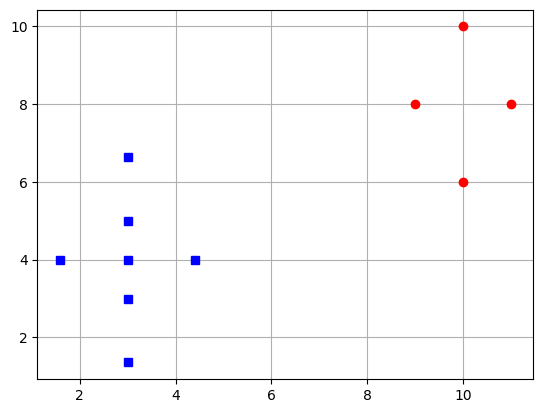

coef_1 = 
 [[0.125   0.     ]
 [0.      0.03125]]
coef_2 = [-14.75  -2.25]
coef_3 = 104.49146860737548
coef3_for_g12_7_4_11 = 105.05108439531091


In [ ]:
# 2-2
import numpy as np
import matplotlib.pyplot as plt

# 부류 1의 평균과 분산, coef 1-3
omega_1 = np.transpose(np.array([[3-math.sqrt(2),4], [3+math.sqrt(2),4], [3,5], [3,3], [3,4+math.sqrt(7)], [3,4-math.sqrt(7)], (3,4)]))
y_omega1 = np.array([1, 1, 1, 1, 1, 1, 1])
omega1_mean = omega_1.mean(axis=1)
omega1_var = np.cov(omega_1, ddof=0)

inv_Sigma1 = np.linalg.inv(omega1_var)

coef1_for_g1 = - 1/2 * inv_Sigma1
coef2_for_g1 = omega1_mean.T @ inv_Sigma1
# np.log : ln함수,  np.linalg.det : 행렬식
coef3_for_g1 = - 1/2 * omega1_mean.T @ inv_Sigma1 @ omega1_mean - 1/2 * np.log(np.linalg.det(omega1_var))

# 부류 2의 평균과 분산, coef 1-3
omega_2 = np.transpose(np.array([[10,6],[11,8],[9,8],[10,10]]))
y_omega2 = np.array([2, 2, 2, 2])
omega2_mean = omega_2.mean(axis=1)
omega2_var = np.cov(omega_2, ddof=0)

inv_Sigma2 = np.linalg.inv(omega2_var)

coef1_for_g2 = - 1/2 * inv_Sigma2
coef2_for_g2 = omega2_mean.T @ inv_Sigma2
coef3_for_g2 = - 1/2 * omega2_mean.T @ inv_Sigma2 @ omega2_mean - 1/2 * np.log(np.linalg.det(omega2_var))

print('mu_1=', omega1_mean)
print('mu_2=', omega2_mean)

print('Sigma_1=\n', omega1_var)
print('Sigma_2=\n', omega2_var)
print('\n')

# np.concatenate(A1, B1) : 행렬 합치기 - default: axis = 0
x_train = np.concatenate([omega_1.T, omega_2.T])
y_train = np.concatenate([y_omega1, y_omega2])
print(x_train)
print(y_train)

# 여러 개 그래프 그리기 : plt.plot(Xm Y1, 'r--', X, Y2, 'bs', X, Y3, 'g^')
plt.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], 'bs', x_train[y_train==2, 0], x_train[y_train==2, 1], 'ro')
# plt.grid(True) : True-격자 활성화, False-격자 비활성화
plt.grid(True)
plt.show()

coef1_for_g12 = coef1_for_g1 - coef1_for_g2
coef2_for_g12 = coef2_for_g1 - coef2_for_g2
coef3_for_g12 = coef3_for_g1 - coef3_for_g2

print('coef_1 = \n', coef1_for_g12)
print('coef_2 =', coef2_for_g12)
print('coef_3 =', coef3_for_g12)

coef3_for_g12_7_4_11 = coef3_for_g12 + np.log(7/11)-np.log(4/11)

print('coef3_for_g12_7_4_11 =', coef3_for_g12_7_4_11)

In [ ]:
# 2-3
import math
import numpy as np

# 부류 1의 평균과 분산, coef 1-3
omega_1 = np.transpose(np.array([[3-math.sqrt(2),4], [3+math.sqrt(2),4], [3,5], [3,3], [3,4+math.sqrt(7)], [3,4-math.sqrt(7)], (3,4)]))
omega1_mean = omega_1.mean(axis=1)
omega1_var = np.cov(omega_1, ddof=0)

inv_Sigma1 = np.linalg.inv(omega1_var)

# 부류 2의 평균과 분산, coef 1-3
omega_2 = np.transpose(np.array([[10,6],[11,8],[9,8],[10,10]]))
omega2_mean = omega_2.mean(axis=1)
omega2_var = np.cov(omega_2, ddof=0)

inv_Sigma2 = np.linalg.inv(omega2_var)

x = np.transpose(np.array([6, 6]))

# 마할라노비스 거리
# math.sqrt = 루트
Mahala_dist1 = math.sqrt( (x - omega1_mean).T @ inv_Sigma1 @ (x - omega1_mean) )
Mahala_dist2 = math.sqrt( (x - omega2_mean).T @ inv_Sigma2 @ (x - omega2_mean) )

print('Mahala distance from mean of omega 1 =',Mahala_dist1)
print('Mahala distance from mean of omega 2 =',Mahala_dist2)

# 유클리디언 거리 - norm 값
Euclidean_dist1 = np.linalg.norm(x - omega1_mean)
Euclidean_dist2 = np.linalg.norm(x - omega2_mean)

print('Euclidean distance from mean of omega 1 =',Euclidean_dist1)
print('Euclidean distance from mean of omega 2 =',Euclidean_dist2)

Mahala distance from mean of omega 1 = 4.183300132670378
Mahala distance from mean of omega 2 = 5.830951894845301
Euclidean distance from mean of omega 1 = 3.605551275463989
Euclidean distance from mean of omega 2 = 4.47213595499958


# 🔥 기말고사 🔥

# 21-1 기말

## 2번

### 2-A : 평균 벡터와 공분산 행렬 구하라

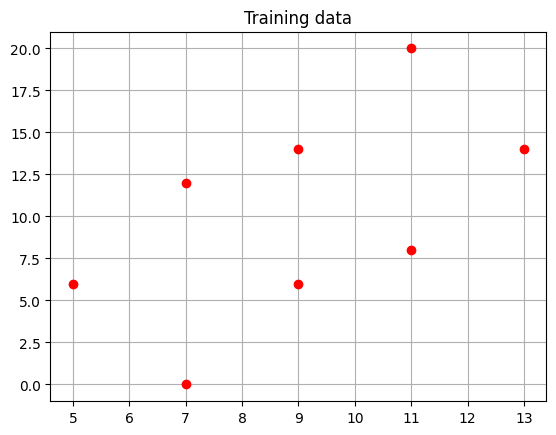

Mean: [ 9. 10.]
Covariance: [[ 6.  8.]
 [ 8. 34.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[5,6], [7,12], [9,6], [7,0], [9,14], [11,8], [11,20], [13,14]])

# 훈련데이터 그래프에 표현
plt.title("Training data")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')
plt.grid(True)
plt.show()

######### 1. 공분산 행렬 구하기 (평균 -> 공분산행렬)
# x의 평균과 공분산 행렬(한열이 한 샘플(.T))
x_mean = x_train.mean(axis=0)
x_var = np.cov(x_train.T, ddof=0)

print('Mean:', x_mean)
print('Covariance:', x_var)


### 2-B : PCA기법으로 최적의 변환 축 구하라


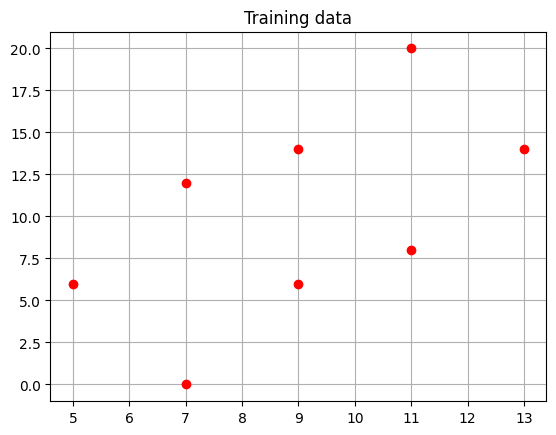

Mean: [ 9. 10.]
Covariance: [[ 6.  8.]
 [ 8. 34.]]
Eigenvalue: [ 3.8754845 36.1245155]
Eigenvector: [[-0.96649965 -0.25666794]
 [ 0.25666794 -0.96649965]]


===== Unit vector about large eigenvalue =====
Unit vector: [[-0.25666794 -0.96649965]]
Feature vector with PCA: [[ -7.08233757 -13.39467133  -8.10900931  -1.79667555 -15.8410065
  -10.55534448 -22.15334026 -16.86767824]]
Variance of feature vector with PCA: 36.12451549659709


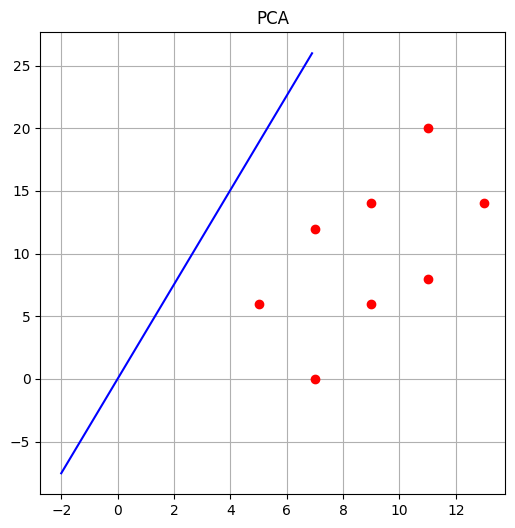

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[5,6], [7,12], [9,6], [7,0], [9,14], [11,8], [11,20], [13,14]])

# 훈련데이터 그래프에 표현
plt.title("Training data")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')
plt.grid(True)
plt.show()

######### 1. 공분산 행렬 구하기 (평균 -> 공분산행렬)
# x의 평균과 공분산 행렬(한열이 한 샘플(.T))
x_mean = x_train.mean(axis=0)
x_var = np.cov(x_train.T, ddof=0)

print('Mean:', x_mean)
print('Covariance:', x_var)

######### 2. 고윳값(Elambda)과 고유벡터(Eu) 구하기
Elambda, Eu = np.linalg.eig(x_var)

print('Eigenvalue:', Elambda)   # [0.91870405 1.76879595]
print('Eigenvector:', Eu)       #[[-0.95098267  0.30924417]
                                # [-0.30924417 -0.95098267]] -> (-0.95, -0.309): 0.92 고유값의 고유벡터 (열이 하나의 고유벡터 x, y)

print('\n')

######### 3. 큰 고윳값에 해당하는 고유벡터 선택
print('===== Unit vector about large eigenvalue =====')
u_for_PCA = np.array([Eu[:,1]])

print('Unit vector:', u_for_PCA)

########## 4. x hat 값과 x hat 분산 구하기
# x hat 값
Feature_vec_PCA = u_for_PCA @ x_train.T   # 1*2 @  2*4 = 1*4
print('Feature vector with PCA:', Feature_vec_PCA)

# x hat의 분산
Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('Variance of feature vector with PCA:', Feature_vec_PCA_var)


########## 6. 그래프에 표현
# 훈련데이터 표현
plt.figure(figsize=(6,6))
plt.title("PCA")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')

# 투영할 직선 표현
t = np.arange(-2, 7, 0.1)
# u_for_PCA[0,1]/u_for_PCA[0,0] 투영할 고유벡터 기울기
plt.plot(t, u_for_PCA[0,1]/u_for_PCA[0,0] * t, 'b-')


# plt.axis([-2, 5, -2, 5])
plt.grid(True)
plt.show()

### 2-C : 변환 축에 훈련 샘플들을 투영하여 변환된 점을 구하라

Projected Feature vector: [[ 1.81780896  3.43798263  2.08132268  0.461149    4.06587843  2.70921847
   5.6860521   4.32939214]
 [ 6.84507677 12.94594514  7.83735465  1.73648628 15.31032722 10.20173673
  21.41119558 16.30260509]]


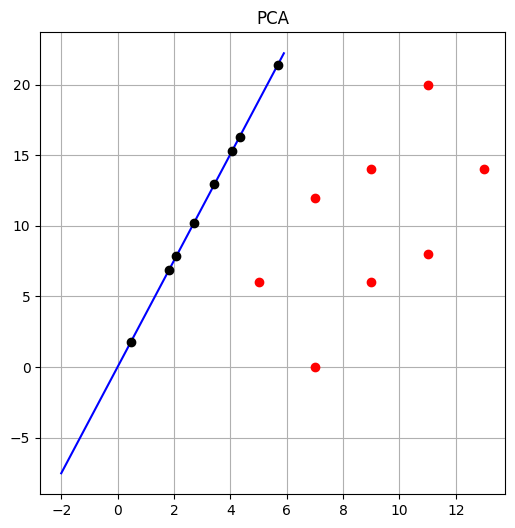

In [ ]:
########## x hat의 좌표 = u o x (내적)(한 열이 하나의 좌표)
P_matrix = u_for_PCA.T * u_for_PCA
Projected_Feature_vec = P_matrix @ x_train.T
print('Projected Feature vector:', Projected_Feature_vec)


########## 그래프에 표현
# 훈련데이터 표현
plt.figure(figsize=(6,6))
plt.title("PCA")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')

# 투영할 직선 표현
t = np.arange(-2, 6, 0.1)
# u_for_PCA[0,1]/u_for_PCA[0,0] 투영할 고유벡터 기울기
plt.plot(t, u_for_PCA[0,1]/u_for_PCA[0,0] * t, 'b-')

# 투영한 점 표현 (x, y, 표현방법)
plt.plot(Projected_Feature_vec[0,:], Projected_Feature_vec[1,:], 'ko')

# plt.axis([-2, 5, -2, 5])
plt.grid(True)
plt.show()

### 2-D : 변환 점의 평균 값 기반으로 작은값을 w1, 큰 값을 w2로 분류하고 변환되기전 샘플들을 구분하라

In [ ]:
import numpy as np

print('Feature vector with PCA:', Feature_vec_PCA)
Feature_vec_mean = Feature_vec_PCA[0].mean(axis=0)
print('투영 특징벡터의 평균값: ', Feature_vec_mean)

y_train = np.array([])
for i in range(8):
  if Feature_vec_PCA[0, i] >= Feature_vec_mean:
    y_train = np.append(y_train, np.array([1]))
  else:
    y_train = np.append(y_train, np.array([2]))

print(y_train)

Feature vector with PCA: [[ -7.08233757 -13.39467133  -8.10900931  -1.79667555 -15.8410065
  -10.55534448 -22.15334026 -16.86767824]]
투영 특징벡터의 평균값:  -11.975007904059913
[1. 2. 1. 1. 2. 1. 2. 2.]


# 10장 : 특징 추출

## 14-15p : 주성분 분석(PCA)

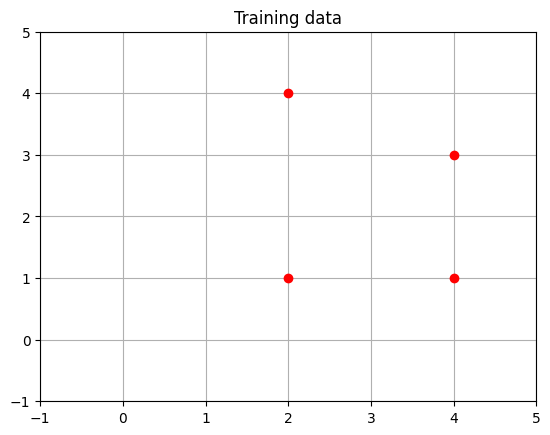

Mean: [3.   2.25]
Covariance: [[ 1.     -0.25  ]
 [-0.25    1.6875]]
Eigenvalue: [0.91870405 1.76879595]
Eigenvector: [[-0.95098267  0.30924417]
 [-0.30924417 -0.95098267]]


===== Unit vector about large eigenvalue =====
고윳값이 큰 고유벡터: [[ 0.30924417 -0.95098267]]
x hat 값: [[-0.33249433 -3.18544234  0.28599402 -1.61597133]]
x hat의 분산: 1.7687959533979825
x hat의 좌표: [[-0.10282193 -0.98507948  0.08844198 -0.49972972]
 [ 0.31619634  3.02930047 -0.27197535  1.53676073]]


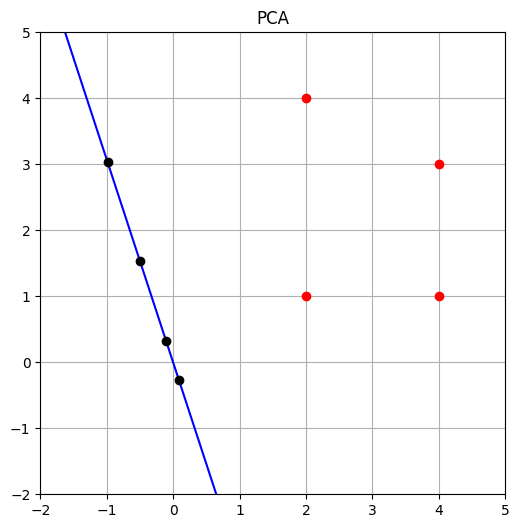



===== Unit vector about small eigenvalue =====
Unit vector: [[-0.95098267 -0.30924417]]
x hat 값: [[-2.21120952 -3.13894203 -4.11317486 -4.7316632 ]]
x hat 분산: 0.9187040466020178
x hat 좌표: [[2.10282193 2.98507948 3.91155802 4.49972972]
 [0.68380366 0.97069953 1.27197535 1.46323927]]


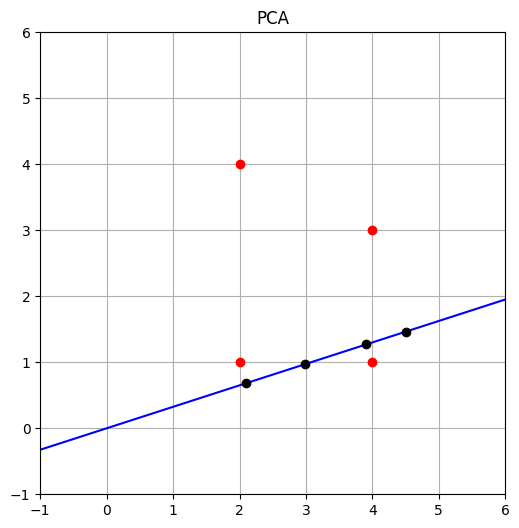

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[2, 1], [2, 4], [4, 1], [4, 3]])

# 훈련데이터 그래프에 표현
plt.title("Training data")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')
plt.axis([-1, 5, -1, 5])
plt.grid(True)
plt.show()

######### 1. 공분산 행렬 구하기 (평균 -> 공분산행렬)
# x의 평균과 공분산 행렬(한열이 한 샘플(.T))
x_mean = x_train.mean(axis=0)   # axis=0 : 열마다 평균
x_var = np.cov(x_train.T, ddof=0)

print('Mean:', x_mean)
print('Covariance:', x_var)

######### 2. 공분산행렬의 고윳값(Elambda)과 고유벡터(Eu) 구하기
Elambda, Eu = np.linalg.eig(x_var)

print('Eigenvalue:', Elambda)   # [0.91870405 1.76879595]
print('Eigenvector:', Eu)       #[[-0.95098267  0.30924417]
                                # [-0.30924417 -0.95098267]] -> (-0.95, -0.309): 0.92 고유값의 고유벡터 (열이 하나의 고유벡터 x, y)

print('\n')

######### 3. 큰 고윳값에 해당하는 고유벡터 선택
print('===== Unit vector about large eigenvalue =====')
u_for_PCA = np.array([Eu[:,1]])

print('고윳값이 큰 고유벡터:', u_for_PCA)

########## 4.[특징추출]x hat 값과 x hat 분산 구하기
# x hat 값
Feature_vec_PCA = u_for_PCA @ x_train.T   # 1*2 @  2*4 = 1*4
print('x hat 값:', Feature_vec_PCA)

# x hat의 분산
Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('x hat의 분산:', Feature_vec_PCA_var)

########## 5. x hat의 좌표 = u o x (내적)(한 열이 하나의 좌표)
P_matrix = u_for_PCA.T * u_for_PCA
Projected_Feature_vec = P_matrix @ x_train.T
print('x hat의 좌표:', Projected_Feature_vec)


########## 6. 그래프에 표현
# 훈련데이터 표현
plt.figure(figsize=(6,6))
plt.title("PCA")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')

# 투영할 직선 표현
t = np.arange(-2, 2, 0.1)
# u_for_PCA[0,1]/u_for_PCA[0,0] 투영할 고유벡터 기울기
plt.plot(t, u_for_PCA[0,1]/u_for_PCA[0,0] * t, 'b-')

# 투영한 점 표현 (x, y, 표현방법)
plt.plot(Projected_Feature_vec[0,:], Projected_Feature_vec[1,:], 'ko')

plt.axis([-2, 5, -2, 5])
plt.grid(True)
plt.show()


# +) 작은 고윳값에 해당하는 고유벡터 선택
print('\n')
print('===== Unit vector about small eigenvalue =====')

u_for_PCA = np.array([Eu[:,0]])

print('Unit vector:', u_for_PCA)

# x hat 값과 분산값
Feature_vec_PCA = u_for_PCA @ x_train.T
print('x hat 값:', Feature_vec_PCA)

Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('x hat 분산:', Feature_vec_PCA_var)

# x hat의 좌표값 (열이 하나의 좌표)
P_matrix = u_for_PCA.T * u_for_PCA
Projected_Feature_vec = P_matrix @ x_train.T
print('x hat 좌표:', Projected_Feature_vec)

# 그래프에 표현
plt.figure(figsize=(6,6))
plt.title("PCA")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')

t = np.arange(-1, 7, 0.1)
plt.plot(t, u_for_PCA[0,1]/u_for_PCA[0,0] * t, 'b-')
plt.plot(Projected_Feature_vec[0,:], Projected_Feature_vec[1,:], 'ko')

plt.axis([-1, 6, -1, 6])
plt.grid(True)
plt.show()

## 23-24p : Fisher의 선형 분별

w: [[0.24253563]
 [0.9701425 ]]
w1의 투영된 점들 :  
 [[1.05882353 0.94117647]
 [4.23529412 3.76470588]]
w2의 투영된 점들 :  
 [[0.35294118 0.47058824]
 [1.41176471 1.88235294]]


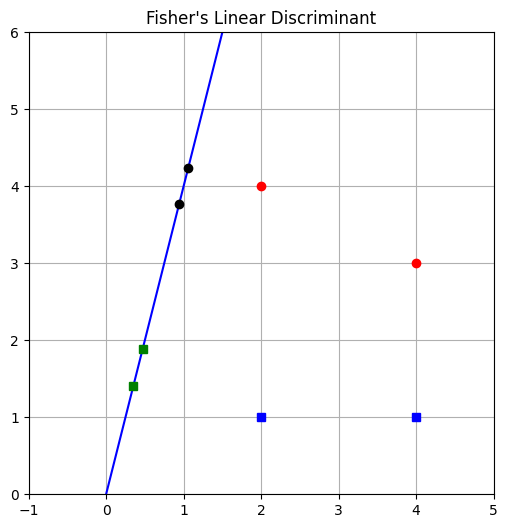

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[2,4], [4,3], [2,1], [4,1]])
y_train = np.array([1, 1, -1, -1])

# 부류별 샘플 분리
omega_1 = x_train[y_train == 1, :]
omega_2 = x_train[y_train == -1, :]

######### 1. 분류별 평균 m1, m2 구하기
m_1 = np.array([omega_1.mean(axis=0)])
m_2 = np.array([omega_2.mean(axis=0)])


######### 2. Sw 구하기
S_1 = np.zeros((2,2))
# omega_1에 해당하는 샘플이 5개라면 range(0, 5)
for j in range(0, len(omega_1)):
  S_1 += (omega_1[j,:] - m_1).T @ (omega_1[j,:] - m_1)

S_2 = np.zeros((2,2))
for j in range(0, len(omega_2)):
  S_2 += (omega_2[j,:] - m_2).T @ (omega_2[j,:] - m_2)

S_W = S_1 + S_2


######### 3. w 구하기
w = np.linalg.inv(S_W) @ (m_1-m_2).T
# 단위벡터화
w = w / np.linalg.norm(w)

print('w:', w)


######### 4. 투영한 점의 좌표 구하기
P_matrix = w.T * w
Projected_omega_1 = P_matrix @ omega_1.T
Projected_omega_2 = P_matrix @ omega_2.T
print("w1의 투영된 점들 : ", '\n', Projected_omega_1)
print("w2의 투영된 점들 : ", '\n', Projected_omega_2)

######### 5. 그래프에 표현
plt.figure(figsize=(6,6))
plt.title("Fisher's Linear Discriminant")

# w1 샘플, w2 샘플 표현
plt.plot(omega_1[:, 0], omega_1[:, 1], 'ro', omega_2[:, 0], omega_2[:, 1], 'bs')

# 투영할 직선 표현
t = np.arange(-2, 2, 0.1)
plt.plot(t, w[1]/w[0] * t, 'b-')

# 투영된 w1, w2 샘플 표현
plt.plot(Projected_omega_1[0,:], Projected_omega_1[1,:], 'ko', Projected_omega_2[0,:], Projected_omega_2[1,:], 'gs')

plt.axis([-1, 5, 0, 6])
plt.grid(True)
plt.show()

# 11장 : 특징 선택

## 25p - PCA : 축 구하기

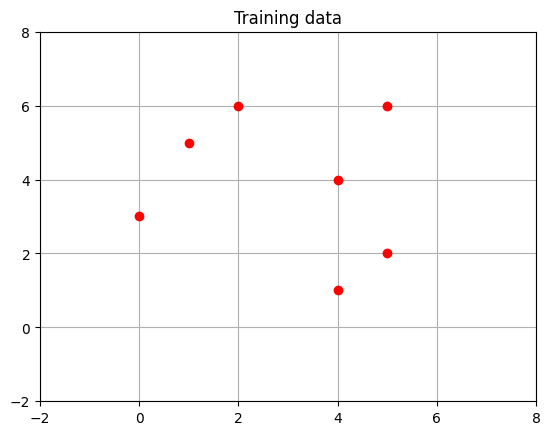

Covariance: [[ 3.42857143 -0.57142857]
 [-0.57142857  3.26530612]]
Eigenvalue: [3.9241688  2.76970875]
Eigenvector: [[ 0.75545395  0.65520174]
 [-0.65520174  0.75545395]]
x hat 값:  [[-1.96560522 -2.52055475 -2.42030254  2.36661408  2.46686629  0.40100885
  -0.15394067]]
x hat 분산: 3.9241688009686104
x hat 좌표: [[-1.48492424 -1.90416306 -1.82842712  1.78786797  1.8636039   0.30294373
  -0.11629509]
 [ 1.28786797  1.65147186  1.58578644 -1.55060967 -1.61629509 -0.2627417
   0.1008622 ]]


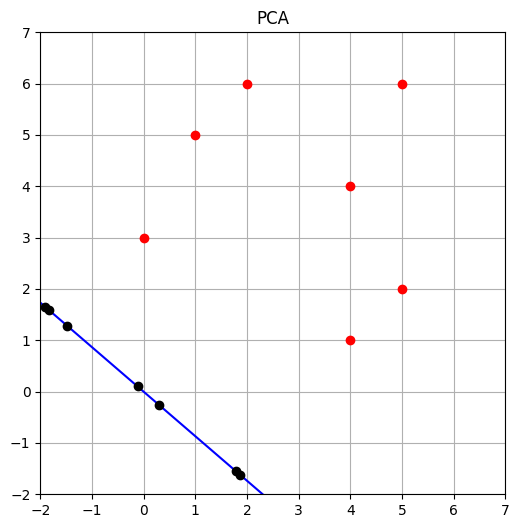

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[0,3], [1,5], [2,6], [4,1], [5,2], [4,4], [5,6]])

plt.title("Training data")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')
plt.axis([-2, 8, -2, 8])
plt.grid(True)
plt.show()

# 1. 공분산행렬 구하기
x_var = np.cov(x_train.T, ddof=0)
print('Covariance:', x_var)

# 2. 고윳값과 고유벡터 구하기
Elambda, Eu = np.linalg.eig(x_var)
print('Eigenvalue:', Elambda)
print('Eigenvector:', Eu)

# 3. 큰 고윳값에 해당하는 고유벡터 선택
u_for_PCA = np.array([Eu[:,0]])

# 4. x hat 값과 x hat의 분산 구하기
Feature_vec_PCA = u_for_PCA @ x_train.T
print('x hat 값: ', Feature_vec_PCA)

Feature_vec_PCA_var = np.cov(Feature_vec_PCA, ddof=0)
print('x hat 분산:', Feature_vec_PCA_var)

# 5. x hat 좌표 구하기
P_matrix = u_for_PCA.T * u_for_PCA
Projected_Feature_vec = P_matrix @ x_train.T
print('x hat 좌표:', Projected_Feature_vec)

# 6. 훈련데이터, 투영 직선, 투영 점 표현
plt.figure(figsize=(6,6))
plt.title("PCA")
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')

t = np.arange(-3, 7, 0.1)
plt.axis([-2, 7, -2, 7])
plt.plot(t, u_for_PCA[0,1]/u_for_PCA[0,0] * t, 'b-')
plt.plot(Projected_Feature_vec[0,:], Projected_Feature_vec[1,:], 'ko')
plt.grid(True)
plt.show()

## 25p - Fisher's : 축 구하고 축끼리 우수성 비교 (by 목적함수)

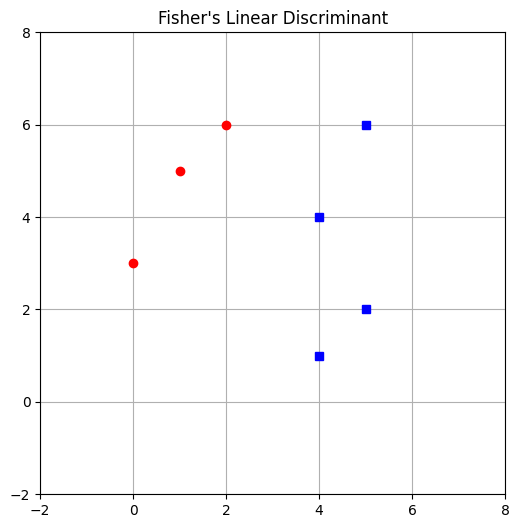

mean_1: [[1.         4.66666667]]
mean_2: [[4.5  3.25]]
S_w: [[ 3.          4.5       ]
 [ 4.5        19.41666667]]
Fisher: [[7.59210526]]
axis (1,0): [[4.08333333]]
axis (0,1): [[0.10336195]]
axis (1/sqrt(2),1/sqrt(2)): [[0.13815208]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

x_train = np.array([[0,3], [1,5], [2,6], [4,1], [5,2], [4,4], [5,6]])
y_train = np.array([1, 1, 1, -1, -1, -1, -1])

omega_1 = x_train[y_train == 1, :]
omega_2 = x_train[y_train == -1, :]

plt.figure(figsize=(6,6))
plt.title("Fisher's Linear Discriminant")
plt.plot(omega_1[:, 0], omega_1[:, 1], 'ro', omega_2[:, 0], omega_2[:, 1], 'bs')
plt.axis([-2, 8, -2, 8])
plt.grid(True)
plt.show()

######### 1. 분류별 평균 m1, m2 구하기
m_1 = np.array([omega_1.mean(axis=0)])
m_2 = np.array([omega_2.mean(axis=0)])

print('mean_1:', m_1)
print('mean_2:', m_2)


######### 2. Sw 구하기
S_1 = np.zeros((2,2))
for j in range(0, len(omega_1)):
  S_1 += (omega_1[j,:] - m_1).T @ (omega_1[j,:] - m_1)

S_2 = np.zeros((2,2))
for j in range(0, len(omega_2)):
  S_2 += (omega_2[j,:] - m_2).T @ (omega_2[j,:] - m_2)

S_W = S_1 + S_2
print('S_w:', S_W)


######### 3. 축과 축에 해당하는 목적함수 구하기
# 2-1)의 축
w = np.linalg.inv(S_W) @ (m_1-m_2).T
w = w / np.linalg.norm(w)

# 목적함수
bar_m1 = w.T @ m_1.T
bar_m2 = w.T @ m_2.T

Objective_for_Fisher = (np.linalg.norm(bar_m1 - bar_m2)**2) / (w.T @ S_W @ w)

print('Fisher:', Objective_for_Fisher)

# 축 비교를 위한 3개의 축
w_10 = np.array([[1], [0]])
w_01 = np.array([[0], [1]])
w_sqrt2 = np.array([[1/math.sqrt(2)],[1/math.sqrt(2)]])

# w_10 축의 목적함수 값
bar_m1_w10 = w_10.T @ m_1.T
bar_m2_w10 = w_10.T @ m_2.T

Objective_for_w10 = (np.linalg.norm(bar_m1_w10 - bar_m2_w10)**2) / (w_10.T @ S_W @ w_10)

print('axis (1,0):', Objective_for_w10)

# w_01의 목적함수
bar_m1_w01 = w_01.T @ m_1.T
bar_m2_w01 = w_01.T @ m_2.T

Objective_for_w01 = (np.linalg.norm(bar_m1_w01 - bar_m2_w01)**2) / (w_01.T @ S_W @ w_01)

print('axis (0,1):', Objective_for_w01)

# w_sqrt2의 목적함수
bar_m1_wsqrt2 = w_sqrt2.T @ m_1.T
bar_m2_wsqrt2 = w_sqrt2.T @ m_2.T

Objective_for_wsqrt2 = (np.linalg.norm(bar_m1_wsqrt2 - bar_m2_wsqrt2)**2) / (w_sqrt2.T @ S_W @ w_sqrt2)

print('axis (1/sqrt(2),1/sqrt(2)):', Objective_for_wsqrt2)


# 12장 : 비지도 학습 - 분할 군집화

## 28p : k-means - 3개 군집

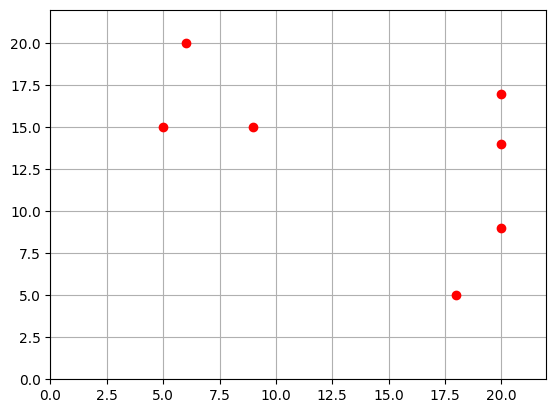

k-means 군집화 결과: [1 1 2 2 0 0 0]


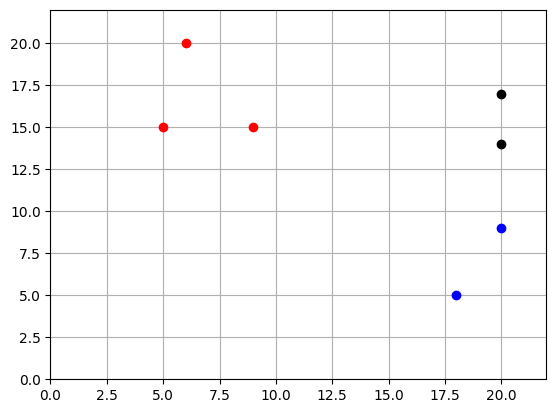

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.cluster import KMeans

x_train = np.array([[18,5], [20,9], [20,14], [20,17], [5,15], [9,15], [6,20]])

plt.axis([0, 22, 0, 22])
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')
plt.grid(True)
plt.show()

# n_clusters: 군집 수
# n_init: 알고리즘 돌리는 수 (auto: 자동 결정)
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(x_train)

y = kmeans.labels_

print('k-means 군집화 결과:',y)

plt.axis([0, 22, 0, 22])
# 3개 군집이므로 y==0, y==1, y==2
plt.plot(x_train[y==0, 0], x_train[y==0, 1], 'ro', x_train[y==1, 0], x_train[y==1, 1], 'bo', x_train[y==2, 0], x_train[y==2, 1], 'ko')
plt.grid(True)
plt.show()


## 31p : k-means - 2개 군집

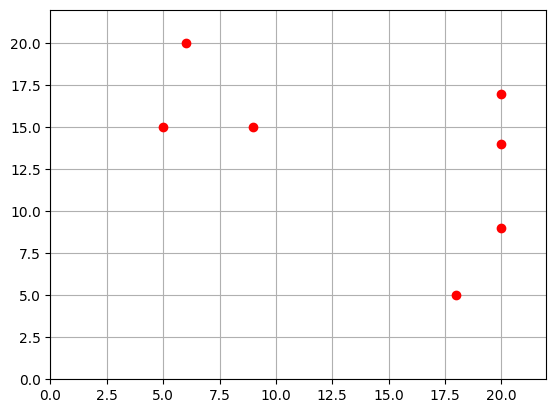

k-means 군집화 결과: [0 0 0 0 1 1 1]


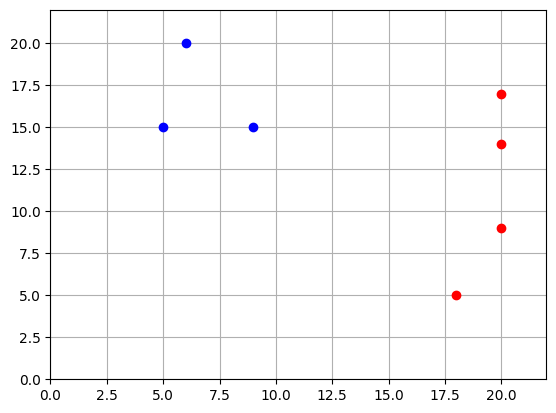

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.cluster import KMeans

x_train = np.array([[18,5], [20,9], [20,14], [20,17], [5,15], [9,15], [6,20]])

plt.axis([0, 22, 0, 22])
plt.plot(x_train[:, 0], x_train[:, 1], 'ro')
plt.grid(True)
plt.show()

# k-means 알고리즘 (n_clusters: 군집 수)
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(x_train)

y = kmeans.labels_

print('k-means 군집화 결과:',y)

plt.axis([0, 22, 0, 22])
# 두 개의 군집이므로 y==0, y==1 만!
plt.plot(x_train[y==0, 0], x_train[y==0, 1], 'ro', x_train[y==1, 0], x_train[y==1, 1], 'bo')
plt.grid(True)
plt.show()


# 13장 : 비지도 학습 - 계층 군집화

## 6-8p : 응집 계층 알고리즘(단일 연결 알고리즘)

### 덴드로그램 (단일연결)

Distancs b/w samples: 
 [[ 0.          4.47213595  9.21954446 12.16552506 16.40121947 13.45362405
  19.20937271]
 [ 4.47213595  0.          5.          8.         16.15549442 12.52996409
  17.80449381]
 [ 9.21954446  5.          0.          3.         15.03329638 11.04536102
  15.23154621]
 [12.16552506  8.          3.          0.         15.13274595 11.18033989
  14.31782106]
 [16.40121947 16.15549442 15.03329638 15.13274595  0.          4.
   5.09901951]
 [13.45362405 12.52996409 11.04536102 11.18033989  4.          0.
   5.83095189]
 [19.20937271 17.80449381 15.23154621 14.31782106  5.09901951  5.83095189
   0.        ]]
[[ 2.          3.          3.          2.        ]
 [ 4.          5.          4.          2.        ]
 [ 0.          1.          4.47213595  2.        ]
 [ 7.          9.          5.          4.        ]
 [ 6.          8.          5.09901951  3.        ]
 [10.         11.         11.04536102  7.        ]]


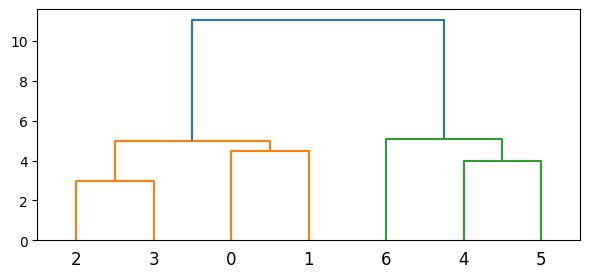

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# for 계층 군집화
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

x_train = np.array([[18,5], [20,9], [20,14], [20,17], [5,15], [9,15], [6,20]])

# pdist: 샘플들간의 각각의 거리를 계산
# squareform 적용(벡터 to 행렬): [[11 12 13 14 ]
#                              [21 22 23 24]
#                              [31 32 33 34]
#                              [41 42 43 44]]   34: c3과 c4의 거리
dist_p = squareform(pdist(x_train))
# print(pdist(x_train))
print("Distancs b/w samples:", "\n", dist_p)

# linkage: 계층군집화 알고리즘
# single: 단일연결(Dmin), complex: 완전연결(Dmax), average: 평균연결(Davg)
Z = linkage(x_train, 'single')

# x축에 +1 -> 군집해의 숫자
print(Z)
# x1 x2 x3 x4 x5 x6 x7
# [[2 3 3 2]  <- c3, c4 군집화 되었고 Dmin=3, 군집개수=2 : c8={c3, c4}
#  [4 5 4 2]  <- c5, c6 군집화 되었고 Dmin=4, 군집개수=2 : c9={c5, c6}
#  [0 1 4 2]  <- c1, c2 군집화 되었고 Dmin=4, 군집개수=2 : c10={c1, c2}
#  [7 9 5 4]] <- c8, c10 군집화 되었고 Dmin=5, 군집개수=4 : c11={c1, c2, c3, c4}

fig = plt.figure(figsize=(7, 3))
dn = dendrogram(Z)
plt.show()

### n개로 응집  (단일연결)

[1 1 1 1 0 0 0]


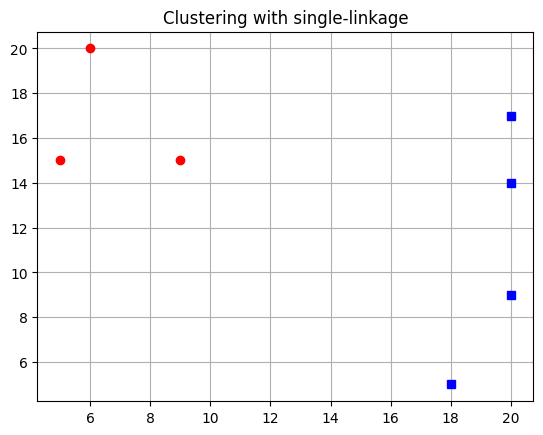

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x_train = np.array([[18,5], [20,9], [20,14], [20,17], [5,15], [9,15], [6,20]])

# 2개의 군집, single(Dmin: 단일연결 알고리즘)인 응집 계층 알고리즘
cluster_single = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
y_single = cluster_single.fit_predict(x_train)

print(y_single)

plt.title("Clustering with single-linkage")
plt.plot(x_train[y_single==0, 0], x_train[y_single==0, 1], 'ro')
plt.plot(x_train[y_single==1, 0], x_train[y_single==1, 1], 'bs')
plt.grid(True)
plt.show()

### 덴드로그램 + 응집 (완전연결)

dist_p: [[ 0.          4.47213595  9.21954446 12.16552506 16.40121947 13.45362405
  19.20937271]
 [ 4.47213595  0.          5.          8.         16.15549442 12.52996409
  17.80449381]
 [ 9.21954446  5.          0.          3.         15.03329638 11.04536102
  15.23154621]
 [12.16552506  8.          3.          0.         15.13274595 11.18033989
  14.31782106]
 [16.40121947 16.15549442 15.03329638 15.13274595  0.          4.
   5.09901951]
 [13.45362405 12.52996409 11.04536102 11.18033989  4.          0.
   5.83095189]
 [19.20937271 17.80449381 15.23154621 14.31782106  5.09901951  5.83095189
   0.        ]]
Z_linkage:  [[ 2.          3.          3.          2.        ]
 [ 4.          5.          4.          2.        ]
 [ 0.          1.          4.47213595  2.        ]
 [ 6.          8.          5.83095189  3.        ]
 [ 7.          9.         12.16552506  4.        ]
 [10.         11.         19.20937271  7.        ]]


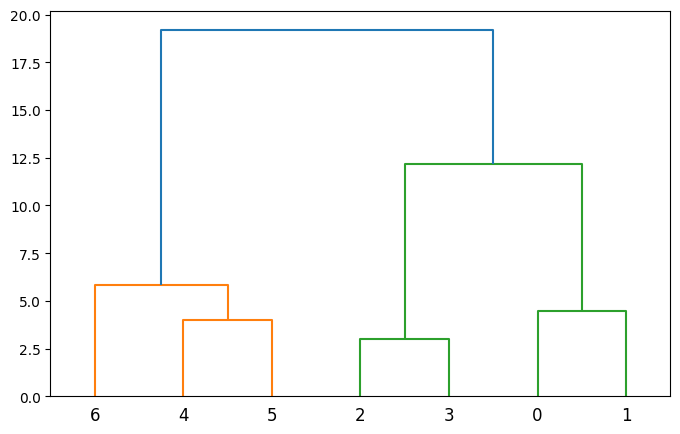

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


y_complete:  [1 1 2 2 0 0 0]


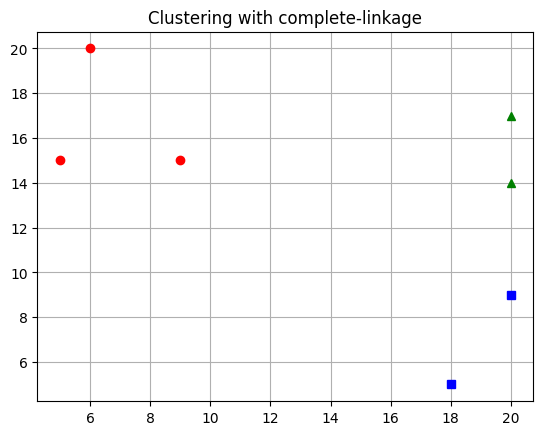

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

x_train = np.array([[18,5], [20,9], [20,14], [20,17], [5,15], [9,15], [6,20]])

dist_p = squareform(pdist(x_train))

print("dist_p:" , dist_p)

# 덴드로그램(계층 군집화 all)
Z = linkage(x_train, 'complete')

print("Z_linkage: ", Z)

fig = plt.figure(figsize=(8, 5))
dn = dendrogram(Z)
plt.show()

# 덴드로그램을 보고 n_clusters 설정하여 계층 군집화 ('complete': 완전연결 Dmax)
cluster_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_complete = cluster_complete.fit_predict(x_train)

print("y_complete: ", y_complete)

plt.title("Clustering with complete-linkage")
plt.plot(x_train[y_complete==0, 0], x_train[y_complete==0, 1], 'ro')
plt.plot(x_train[y_complete==1, 0], x_train[y_complete==1, 1], 'bs')
plt.plot(x_train[y_complete==2, 0], x_train[y_complete==2, 1], 'g^')
plt.grid(True)
plt.show()

## 16-18p : 신경망(자기 조직화 맵)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[18,5], [20,9], [20,14], [20,17], [5,15], [9,15], [6,20]])
init_w = np.array([[10.0,12.0],[6.0,6.0],[16.0,14.0]])
comp = np.array([0.0, 0.0, 0.0])     # 한 샘플과 w 간의 거리

rho = 0.6

c1 = []
c2 = []
c3 = []

# for i  in range(2):                 # w와 rho 조정 몇 번 할 것이지 -> rho 갱신코드도 추가
  # W와 rho 조정
for i in range(len(x_train)):        # i : 샘플의 개수
  print(i, '=========')
  for j in range(len(init_w)):       # j : 군집 개수
    comp[j] = np.linalg.norm(x_train[i,:] - init_w[j,:])
  print("샘플과 w간의 거리:",comp)
  idx = np.argmin(comp)              # np.argmin(a) : 가장 작은 a값의 index 반환
  print("변경할 w index:", idx)
  init_w[idx,:] = init_w[idx,:] + rho*(x_train[i,:] - init_w[idx,:])
  print("변경된 w:", '\n', init_w, '\n')
# rho *= 0.8


# 변경된 W를 기반으로 군집화 진행
for i in range(len(x_train)):
  for j in range(len(init_w)):
    comp[j] = np.linalg.norm(x_train[i,:] - init_w[j,:])
  print("{}번 샘플과 변경된 w간의 거리:".format(i), comp)
  idx = np.argmin(comp)
  if idx == 0:
    c1.append(x_train[i])
  elif idx == 1:
    c2.append(x_train[i])
  else:
    c3.append(x_train[i])

print("c1:", c1)
print("c2:", c2)
print("c3:", c3)

0 =========
샘플과 w간의 거리: [10.63014581 12.04159458  9.21954446]
변경할 w index: 2
변경된 w: 
 [[10.  12. ]
 [ 6.   6. ]
 [17.2  8.6]] 

1 =========
샘플과 w간의 거리: [10.44030651 14.31782106  2.82842712]
변경할 w index: 2
변경된 w: 
 [[10.   12.  ]
 [ 6.    6.  ]
 [18.88  8.84]] 

2 =========
샘플과 w간의 거리: [10.19803903 16.1245155   5.28015151]
변경할 w index: 2
변경된 w: 
 [[10.    12.   ]
 [ 6.     6.   ]
 [19.552 11.936]] 

3 =========
샘플과 w간의 거리: [11.18033989 17.80449381  5.08377812]
변경할 w index: 2
변경된 w: 
 [[10.     12.    ]
 [ 6.      6.    ]
 [19.8208 14.9744]] 

4 =========
샘플과 w간의 거리: [ 5.83095189  9.05538514 14.82082211]
변경할 w index: 0
변경된 w: 
 [[ 7.     13.8   ]
 [ 6.      6.    ]
 [19.8208 14.9744]] 

5 =========
샘플과 w간의 거리: [ 2.33238076  9.48683298 10.82083028]
변경할 w index: 0
변경된 w: 
 [[ 8.2    14.52  ]
 [ 6.      6.    ]
 [19.8208 14.9744]] 

6 =========
샘플과 w간의 거리: [ 5.90511643 14.         14.70616089]
변경할 w index: 0
변경된 w: 
 [[ 6.88   17.808 ]
 [ 6.      6.    ]
 [19.8208 14.9744]] 

0번 샘플과 변경된 w간의

# 과제 3 : 응집 계층 알고리즘

## 3-1 : Dmax, Dmin, Dave, Dmean, Drep 계산

부류간 각 샘플간의 거리: 
 [[63.28506933 98.02040604 58.13776741 41.43669871]
 [59.30430001 94.02127419 54.58937626 37.48332963]
 [47.16990566 82.87339742 50.91168825 29.68164416]
 [55.03635162 90.19977827 53.25410782 34.4818793 ]]
c_1의 평균: [92.  69.5]
c_2의 평균: [148.5  59. ]
c_1의 rep: 3
c_2의 rep: 0


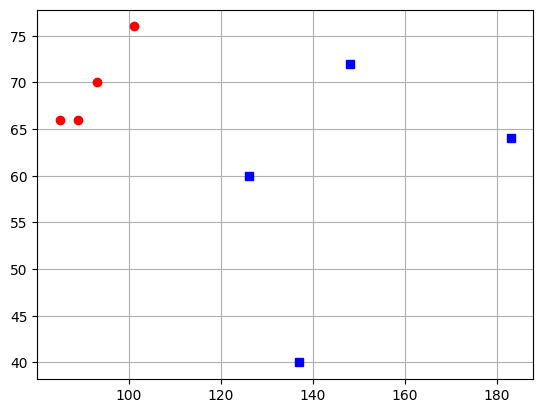

D_max: 98.02040603874276 9607.999999999998
D_min: 29.68164415931166 880.9999999999999
D_ave: 59.36793587992838 3524.551810643288
D_mean: 57.467382052778426 3302.5
D_rep: 55.036351623268054 3029.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[85,66], [89,66], [101,76], [93,70], [148,72], [183,64], [137,40], [126,60]])

c_1 = x_train[0:4,:]
c_2 = x_train[4:8,:]

# 부류 간의 각 샘플간의 거리
dist = np.zeros((len(c_1),len(c_2)))
for i in range(0,len(c_1)):
  for j in range(0,len(c_2)):
    dist[i,j] = np.linalg.norm(c_1[i,:] - c_2[j,:])

print("부류간 각 샘플간의 거리:", '\n', dist)

# Dmax, Dmin, Dave, Dmean 구하기
D_max = np.max(dist)
D_min = np.min(dist)
D_ave = np.sum(dist)/4/4
D_mean = np.linalg.norm(c_1.mean(axis=0) - c_2.mean(axis=0))   # axis=0: 열마다 평균

print("c_1의 평균:", c_1.mean(axis=0))
print("c_2의 평균:", c_2.mean(axis=0))

# Drep 구하기
dist_c1 = np.zeros((len(c_1),len(c_1)))
for i in range(0,len(c_1)):
  for j in range(0,len(c_1)):
    dist_c1[i,j] = np.linalg.norm(c_1[i,:] - c_1[j,:])

rep_c1 = np.argmin(dist_c1.sum(axis=0))
print("c_1의 rep:", rep_c1)

dist_c2 = np.zeros((len(c_2),len(c_2)))
for i in range(0,len(c_2)):
  for j in range(0,len(c_2)):
    dist_c2[i,j] = np.linalg.norm(c_2[i,:] - c_2[j,:])

rep_c2 = np.argmin(dist_c2.sum(axis=0))
print("c_2의 rep:", rep_c2)

D_rep = np.linalg.norm(c_1[rep_c1,:] - c_2[rep_c2,:])

# 그래프 표현
plt.plot(x_train[0:4, 0], x_train[0:4, 1], 'ro')  # c_1
plt.plot(x_train[4:8, 0], x_train[4:8, 1], 'bs')  # c_2
plt.grid(True)
plt.show()

# print
print('D_max:', D_max, D_max*D_max)
print('D_min:', D_min, D_min*D_min)
print('D_ave:', D_ave, D_ave*D_ave)
print('D_mean:', D_mean, D_mean*D_mean)
print('D_rep:', D_rep, D_rep*D_rep)

## 3-2 : 2개 군집 | 완전 연결 v.s. 단일 연결 알고리즘

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

x_train = np.array([[148,72], [85,66], [183,64], [89,66], [137,40], [101,76], [126,60], [93,70]])

dist_p = squareform(pdist(x_train))

# 단일연결
Z_single = linkage(x_train, 'single')
print("Z_single: ", Z_single)
# 완전연결
Z_complete = linkage(x_train, 'complete')
print("Z_complete: ", Z_complete)


# 단일연결 군집화
cluster_single = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
y_single = cluster_single.fit_predict(x_train)
print("y_single: ", y_single)

# 완전연결 군집화
cluster_complete = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_complete = cluster_complete.fit_predict(x_train)
print("y_complete: ", y_complete)

Z_single:  [[ 1.          3.          4.          2.        ]
 [ 7.          8.          5.65685425  3.        ]
 [ 5.          9.         10.          4.        ]
 [ 4.          6.         22.82542442  2.        ]
 [ 0.         11.         25.05992817  3.        ]
 [10.         12.         29.68164416  7.        ]
 [ 2.         13.         35.90264614  8.        ]]
Z_complete:  [[ 1.          3.          4.          2.        ]
 [ 7.          8.          8.94427191  3.        ]
 [ 5.          9.         18.86796226  4.        ]
 [ 4.          6.         22.82542442  2.        ]
 [ 0.         11.         33.83784863  3.        ]
 [ 2.         12.         57.14017851  4.        ]
 [10.         13.         98.02040604  8.        ]]
y_single:  [0 0 1 0 0 0 0 0]
y_complete:  [0 1 0 1 0 1 0 1]


==============완전연결==============
Z_linkage:  [[ 1.          3.          4.          2.        ]
 [ 7.          8.          8.94427191  3.        ]
 [ 5.          9.         18.86796226  4.        ]
 [ 4.          6.         22.82542442  2.        ]
 [ 0.         11.         33.83784863  3.        ]
 [ 2.         12.         57.14017851  4.        ]
 [10.         13.         98.02040604  8.        ]]


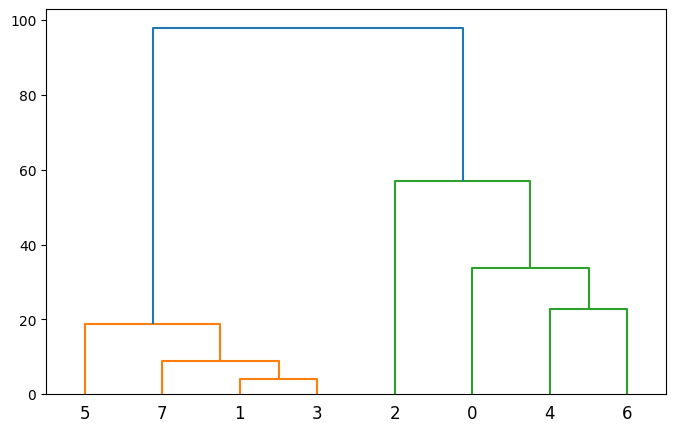

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


y_complete:  [0 1 0 1 0 1 0 1]


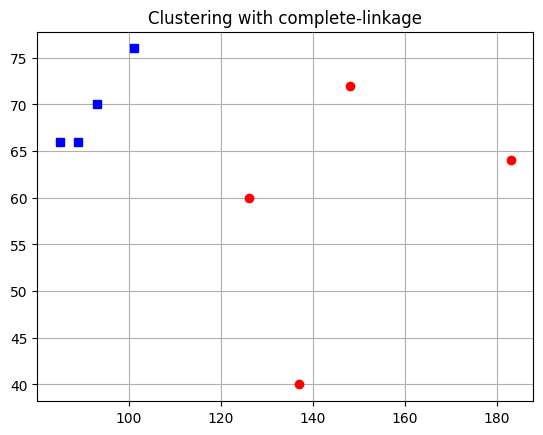



==============단일연결==============
Z_linkage:  [[ 1.          3.          4.          2.        ]
 [ 7.          8.          5.65685425  3.        ]
 [ 5.          9.         10.          4.        ]
 [ 4.          6.         22.82542442  2.        ]
 [ 0.         11.         25.05992817  3.        ]
 [10.         12.         29.68164416  7.        ]
 [ 2.         13.         35.90264614  8.        ]]


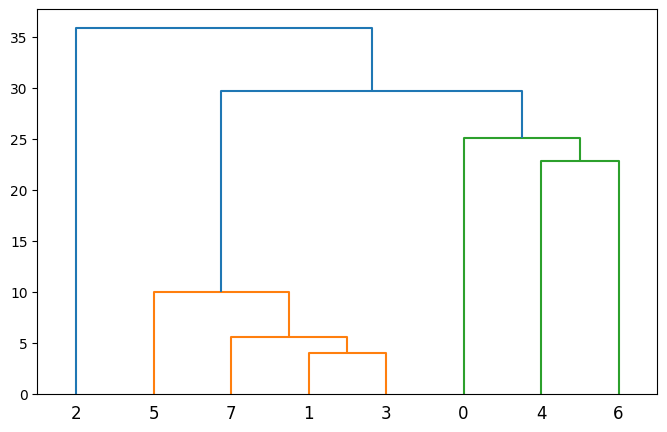

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


y_single:  [0 0 1 0 0 0 0 0]


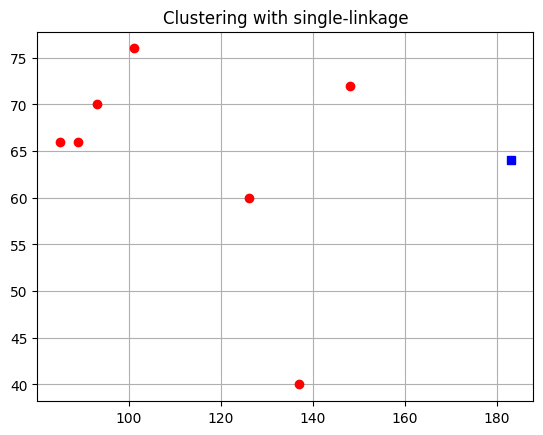

In [ ]:
# 3-2 Solution
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

x_train = np.array([[148,72], [85,66], [183,64], [89,66], [137,40], [101,76], [126,60], [93,70]])

# 완전 연결 알고리즘 (Dmax)
print("==============완전연결==============")
# - 덴드로그램
Z = linkage(x_train, 'complete')
print("Z_linkage: ", Z)
fig = plt.figure(figsize=(8, 5))
dn = dendrogram(Z)
plt.show()

# - 응집 알고리즘
cluster_complete = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_complete = cluster_complete.fit_predict(x_train)
print("y_complete: ", y_complete)

plt.title("Clustering with complete-linkage")
plt.plot(x_train[y_complete==0, 0], x_train[y_complete==0, 1], 'ro')
plt.plot(x_train[y_complete==1, 0], x_train[y_complete==1, 1], 'bs')
plt.grid(True)
plt.show()
print('\n')

# 단일 연결 알고리즘 (Dmin)
print("==============단일연결==============")
Z = linkage(x_train, 'single')
print("Z_linkage: ", Z)
fig = plt.figure(figsize=(8, 5))
dn = dendrogram(Z)
plt.show()

cluster_single = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
y_single = cluster_single.fit_predict(x_train)
print("y_single: ", y_single)

plt.title("Clustering with single-linkage")
plt.plot(x_train[y_single==0, 0], x_train[y_single==0, 1], 'ro')
plt.plot(x_train[y_single==1, 0], x_train[y_single==1, 1], 'bs')
plt.grid(True)
plt.show()